In [2]:
import pandas as pd

# Creating dataframes for X-Small, Medium, and X-Large warehouses
data_x_small = {
    'XGBoost Hour Total': [59, 59, 57],
    'XGBoost Day Total': [58, 56, 57],
    'XGBoost Week Total': [56, 55, 58],
    'XGBoost Month Total': [56, 54, 59]
}
data_medium = {
    'XGBoost Hour Total': [59, 62, 60],
    'XGBoost Day Total': [57, 57, 61],
    'XGBoost Week Total': [58, 62, 61],
    'XGBoost Month Total': [67, 64, 59]
}
data_x_large = {
    'XGBoost Hour Total': [65, 65, 71],
    'XGBoost Day Total': [57, 56, 63],
    'XGBoost Week Total': [56, 57, 62],
    'XGBoost Month Total': [66, 59, 64]
}

# Creating dataframes for each warehouse size
df_x_small = pd.DataFrame(data_x_small, index=['Run 1', 'Run 2', 'Run 3'])
df_medium = pd.DataFrame(data_medium, index=['Run 1', 'Run 2', 'Run 3'])
df_x_large = pd.DataFrame(data_x_large, index=['Run 1', 'Run 2', 'Run 3'])

# Adding a 'Warehouse Size' column and combining dataframes
df_x_small['Warehouse Size'] = 'X-Small'
df_medium['Warehouse Size'] = 'Medium'
df_x_large['Warehouse Size'] = 'X-Large'

# Concatenating all dataframes into one
combined_df = pd.concat([df_x_small, df_medium, df_x_large])

combined_df

,XGBoost Hour Total,XGBoost Day Total,XGBoost Week Total,XGBoost Month Total,Warehouse Size
Run 1,59,58,56,56,X-Small
Run 2,59,56,55,54,X-Small
Run 3,57,57,58,59,X-Small
Run 1,59,57,58,67,Medium
Run 2,62,57,62,64,Medium
Run 3,60,61,61,59,Medium
Run 1,65,57,56,66,X-Large
Run 2,65,56,57,59,X-Large
Run 3,71,63,62,64,X-Large


In [4]:
# Calculating the mean across runs for each warehouse size
averages_across_runs = combined_df.groupby('Warehouse Size').mean().reset_index()

averages_across_runs

,Warehouse Size,XGBoost Hour Total,XGBoost Day Total,XGBoost Week Total,XGBoost Month Total
0,Medium,60.333333,58.333333,60.333333,63.333333
1,X-Large,67.000000,58.666667,58.333333,63.000000
2,X-Small,58.333333,57.000000,56.333333,56.333333


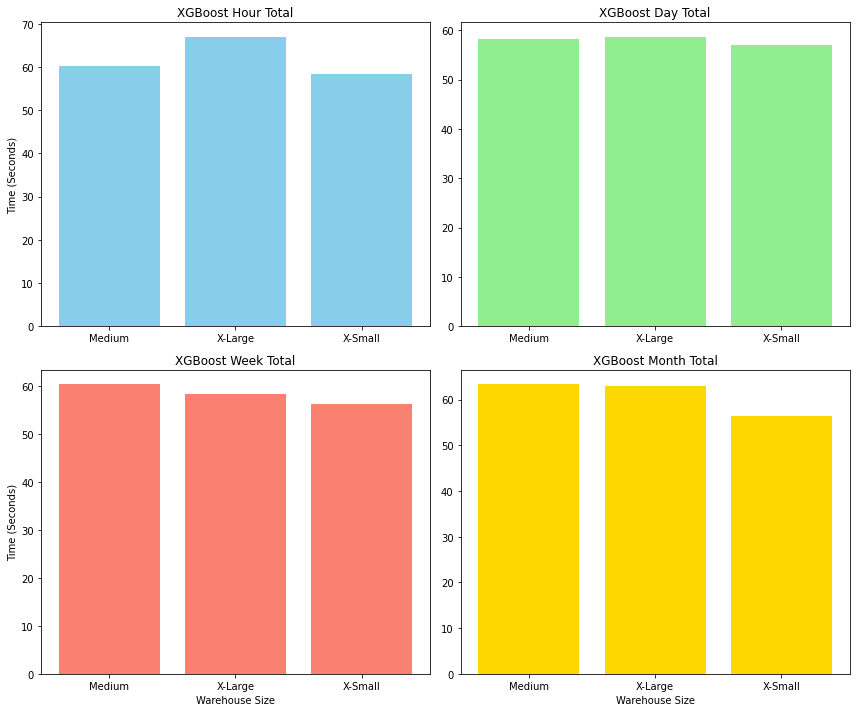

In [6]:
# Filter the dataframe for each time period
xgboost_hour = averages_across_runs[['Warehouse Size', 'XGBoost Hour Total']]
xgboost_day = averages_across_runs[['Warehouse Size', 'XGBoost Day Total']]
xgboost_week = averages_across_runs[['Warehouse Size', 'XGBoost Week Total']]
xgboost_month = averages_across_runs[['Warehouse Size', 'XGBoost Month Total']]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting for XGBoost Hour Total
axs[0, 0].bar(xgboost_hour['Warehouse Size'], xgboost_hour['XGBoost Hour Total'], color='skyblue')
axs[0, 0].set_title('XGBoost Hour Total')
axs[0, 0].set_ylabel('Time (Seconds)')

# Plotting for XGBoost Day Total
axs[0, 1].bar(xgboost_day['Warehouse Size'], xgboost_day['XGBoost Day Total'], color='lightgreen')
axs[0, 1].set_title('XGBoost Day Total')

# Plotting for XGBoost Week Total
axs[1, 0].bar(xgboost_week['Warehouse Size'], xgboost_week['XGBoost Week Total'], color='salmon')
axs[1, 0].set_title('XGBoost Week Total')
axs[1, 0].set_xlabel('Warehouse Size')
axs[1, 0].set_ylabel('Time (Seconds)')

# Plotting for XGBoost Month Total
axs[1, 1].bar(xgboost_month['Warehouse Size'], xgboost_month['XGBoost Month Total'], color='gold')
axs[1, 1].set_title('XGBoost Month Total')
axs[1, 1].set_xlabel('Warehouse Size')

# Adjust layout
plt.tight_layout()
plt.show()

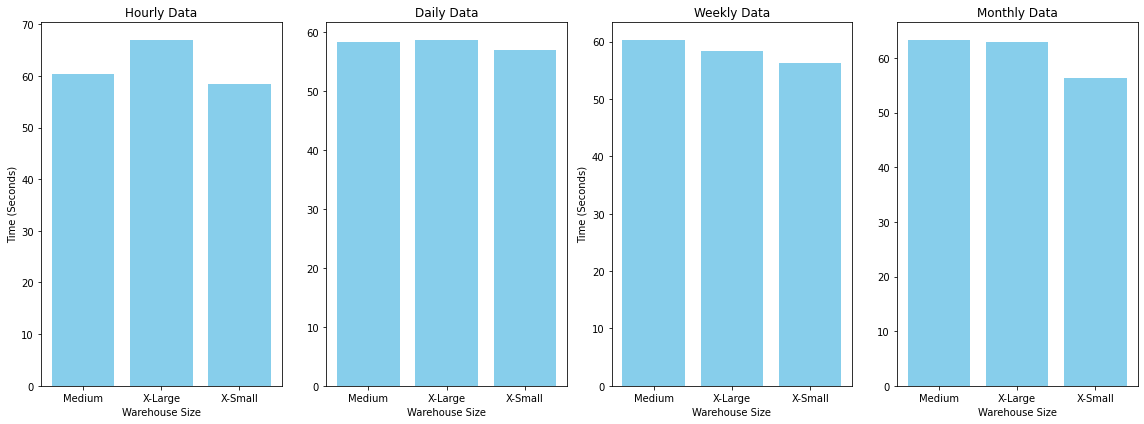

In [12]:
# Create a 1x4 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Plotting for XGBoost Hour Total
axs[0].bar(xgboost_hour['Warehouse Size'], xgboost_hour['XGBoost Hour Total'], color='skyblue')
axs[0].set_title('Hourly Data')
axs[0].set_ylabel('Time (Seconds)')
axs[0].tick_params(axis='x')
axs[0].set_xlabel('Warehouse Size')

# Plotting for XGBoost Day Total
axs[1].bar(xgboost_day['Warehouse Size'], xgboost_day['XGBoost Day Total'], color='skyblue')
axs[1].set_title('Daily Data')
axs[1].tick_params(axis='x')
axs[1].set_xlabel('Warehouse Size')

# Plotting for XGBoost Week Total
axs[2].bar(xgboost_week['Warehouse Size'], xgboost_week['XGBoost Week Total'], color='skyblue')
axs[2].set_title('Weekly Data')
axs[2].set_xlabel('Warehouse Size')
axs[2].set_ylabel('Time (Seconds)')
axs[2].set_xlabel('Warehouse Size')
axs[2].tick_params(axis='x') 
                   
# Plotting for XGBoost Month Total
axs[3].bar(xgboost_month['Warehouse Size'], xgboost_month['XGBoost Month Total'], color='skyblue')
axs[3].set_title('Monthly Data')
axs[3].set_xlabel('Warehouse Size')
axs[3].tick_params(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

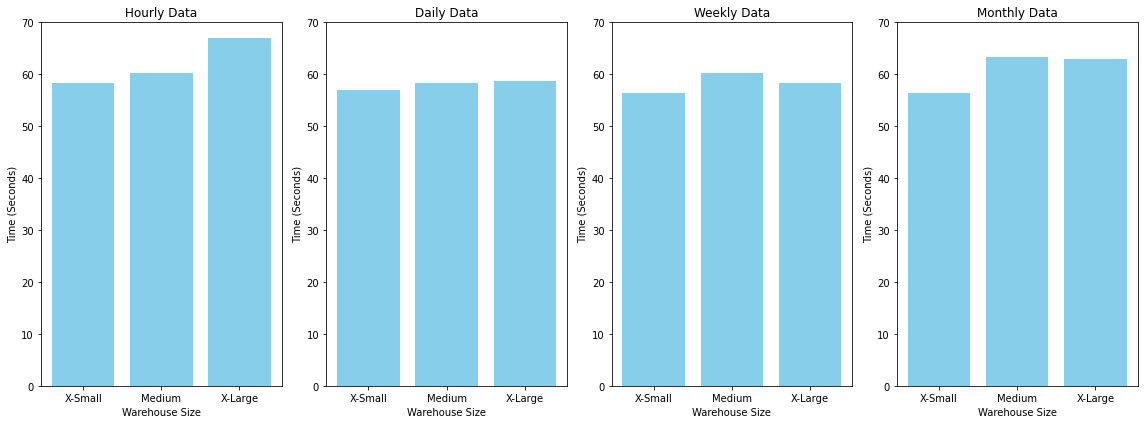

In [15]:
import matplotlib.pyplot as plt

# Define the order of warehouse sizes
warehouse_order = ['X-Small', 'Medium', 'X-Large']

# Reorder the data based on the warehouse order
xgboost_hour = xgboost_hour.set_index('Warehouse Size').loc[warehouse_order].reset_index()
xgboost_day = xgboost_day.set_index('Warehouse Size').loc[warehouse_order].reset_index()
xgboost_week = xgboost_week.set_index('Warehouse Size').loc[warehouse_order].reset_index()
xgboost_month = xgboost_month.set_index('Warehouse Size').loc[warehouse_order].reset_index()

# Create a 1x4 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Plotting for XGBoost Hour Total
axs[0].bar(xgboost_hour['Warehouse Size'], xgboost_hour['XGBoost Hour Total'], color='skyblue')
axs[0].set_title('Hourly Data')
axs[0].set_ylabel('Time (Seconds)')
axs[0].tick_params(axis='x')
axs[0].set_xlabel('Warehouse Size')
axs[0].set_ylim(0, 70)  # Set y-axis limit

# Plotting for XGBoost Day Total
axs[1].bar(xgboost_day['Warehouse Size'], xgboost_day['XGBoost Day Total'], color='skyblue')
axs[1].set_title('Daily Data')
axs[1].tick_params(axis='x')
axs[1].set_ylabel('Time (Seconds)')
axs[1].set_xlabel('Warehouse Size')
axs[1].set_ylim(0, 70)  # Set y-axis limit

# Plotting for XGBoost Week Total
axs[2].bar(xgboost_week['Warehouse Size'], xgboost_week['XGBoost Week Total'], color='skyblue')
axs[2].set_title('Weekly Data')
axs[2].set_xlabel('Warehouse Size')
axs[2].set_ylabel('Time (Seconds)')
axs[2].set_xlabel('Warehouse Size')
axs[2].tick_params(axis='x')
axs[2].set_ylim(0, 70)  # Set y-axis limit
                   
# Plotting for XGBoost Month Total
axs[3].bar(xgboost_month['Warehouse Size'], xgboost_month['XGBoost Month Total'], color='skyblue')
axs[3].set_title('Monthly Data')
axs[3].set_xlabel('Warehouse Size')
axs[3].tick_params(axis='x')
axs[3].set_ylabel('Time (Seconds)')
axs[3].set_ylim(0, 70)  # Set y-axis limit

# Adjust layout
plt.tight_layout()
plt.show()